In [1]:
#Import pandas, matplotlib.pyplot, numpy, and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
#import csv file into a pandas DataFrame as 'raw_data'
data = pd.read_csv('data.csv', sep=',')

In [3]:
#check to make sure I imported what I wanted to, and to remind myself of the contents of this df
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [4]:
#check the shape of the df -- it has 4920 entries and 133 columns. The columns contain 132 symptoms, with a final 'prognosis' column that labels the disease for that observation
data.shape

(4920, 133)

In [5]:
#turn column headers into a list of all possible symptoms, to iterate through later
symptoms = np.array(data.columns.values)
symptoms = symptoms[0:(len(symptoms)-1)] #removes the final header "prognosis" from the symptom list

In [6]:
#check properties and content of the generated symptom list 
print(symptoms)
print("number of symptoms", len(symptoms))
print(type(symptoms))

['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_ urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'
 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'
 'pain_in_anal_region' 'bloody_

In [7]:
#create a disease list, to iterate through later. Check contents and properties for accuracy
diseases = data['prognosis'].unique()
print(diseases)
print("number of diseases", len(diseases))
print(type(diseases))

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
number of diseases 41
<class 'numpy.ndarray'>


#### In order to visualize the data in totality, I would like to create a matrix of bar charts, where symptoms are plotted grouped by disease. In order to do this, I need to reformat the data to be matplotlib friendly. After trial and error, I decide to create a new DataFrame that specifically holds the frequency counts of each symptom for each diagnosis and then plot those frequencies as bar charts, separated by diagnosis.

In [8]:
#first, I define a function to automate 
def count_symps(disease):
    disease = data[data['prognosis']==disease]
    sums = []
    for symptom in symptoms:
        sums.append(disease[symptom].sum())
    return sums

In [9]:
#next, I create a df to hold all the symptom count data by prognosis and iterate through each
#prognosis using the count_symps functino defined above
count_df = pd.DataFrame({'symptoms': symptoms})
for disease in diseases:
    count_df[disease] = count_symps(disease)

In [10]:
#I take a look at the count_df generated -- looks awesome!! It's ready to plot.
count_df.head()

symptoms  Fungal infection  Allergy  GERD  Chronic cholestasis  \
0               itching               108        0     0                  114   
1             skin_rash               108        0     0                    0   
2  nodal_skin_eruptions               108        0     0                    0   
3   continuous_sneezing                 0      108     0                    0   
4             shivering                 0      108     0                    0   

   Drug Reaction  Peptic ulcer diseae  AIDS  Diabetes   Gastroenteritis  ...  \
0            114                    0     0          0                0  ...   
1            108                    0     0          0                0  ...   
2              0                    0     0          0                0  ...   
3              0                    0     0          0                0  ...   
4              0                    0     0          0                0  ...   

   Hypothyroidism  Hyperthyroidism  Hypoglycemia  Osteoarthristis  Arthritis  \
0               0                0             0                0          0   
1               0                0             0                0          0   
2               0                0             0                0          0   
3               0                0             0                0          0   
4               0                0             0                0          0   

   (vertigo) Paroymsal  Positional Vertigo  Acne  Urinary tract infection  \
0                                        0     0                        0   
1                                        0   114                        0   
2                                        0     0                        0   
3                                        0     0                        0   
4                                        0     0                        0   

   Psoriasis  Impetigo  
0          0         0  
1        114       114  
2          0         0  
3          0         0  
4          0         0  

[5 rows x 42 columns]

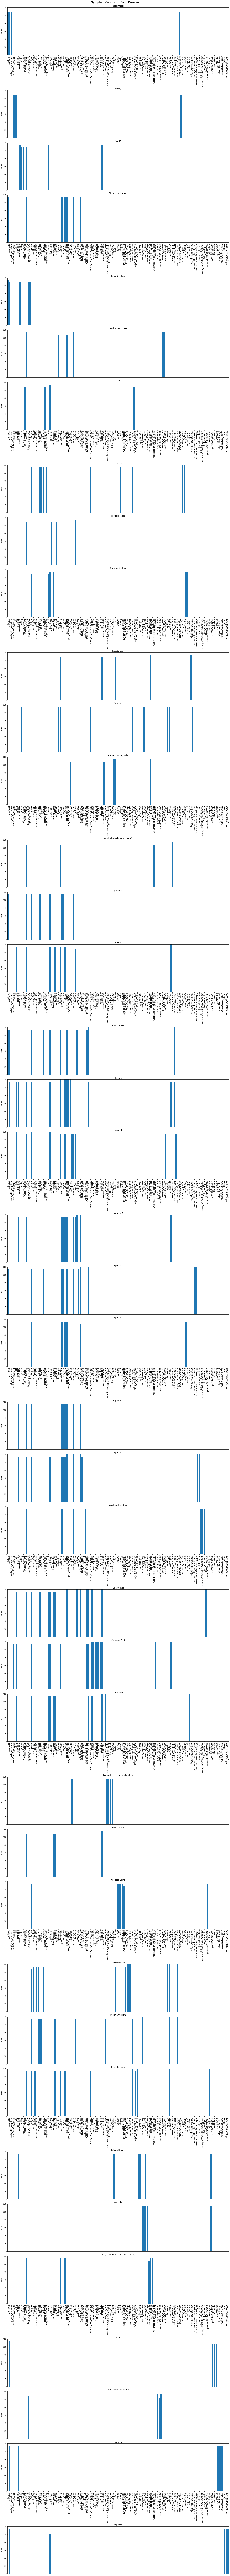

In [11]:
#create the figure and axes subplot objects and iterate through a loop to chart each disease's symptom frequency
fig, ax = plt.subplots(len(diseases),1, figsize=(20,225), sharey=True, constrained_layout=True)
fig.suptitle("Symptom Counts for Each Disease", size='xx-large')
plt.style.use('seaborn-notebook')
for i in range(len(diseases)):
    ax[i].bar(count_df['symptoms'], count_df[diseases[i]])
    ax[i].set_title(diseases[i], fontsize='large')
    ax[i].tick_params(axis='x', labelrotation = 90, labelsize = 12)
    ax[i].set_ylabel('count')
    ax[i].margins(0)
    ax[i].set_yticks([0,20,40,60,80,100,120])
    ax[i].set_xticks([])
    
#set up x labels every 3 axes subplots:
for i in range(0,len(diseases),3):
    ax[i].set_xticks(symptoms)

These charts are very informative! We can essentially see a "signature" of symptoms associated with each disease we hope to model. Each disease has a visually distinct "signature," which is promising to see. 

We know that each disease can have up to 120 counts of each symptom. If a frequency bar reaches 120 (the top of the plot), then that indicates that every single instance of that disease in our training data was positive for that symptom. While this isn't exactly rare (check out the "Common cold" or "Hyperthyroidism" charts, among others, for examples), it is far more common in our data set for many, but not all, of the instances of a disease to show a particular symptom. Notice that no symptom frequency bar is less than ~100 instances out of 120. Notice also that each prognosis has multiple symtoms 

In these cases, our model will likely need to look at the overall signature of symptoms in order to make an accurate classification. In cases where 100% of our samples are positive for a given symptom, our model can make use of that information in conjunction with the signature of symptoms in order to narrow down it's classification.

### Now, I'm curious about how fequently each symptom is associated with each of the diagnoses. I'm essentially going to plot the opposite of what I did before, this time grouping the frequency of each disease by the symptom

In [12]:
#I start by transposing my existing count DataFrame and ironing out the formatting by reassigning the first row to be the header values
symp_df = count_df.transpose() 
symp_df.rename(index = {'symptoms':'disease'},inplace=True)
symp_df.reset_index(inplace=True)
symp_df.columns = symp_df.iloc[0]
symp_df = symp_df[1:]
symp_df.head()

#ready to roll!

0              disease itching skin_rash nodal_skin_eruptions  \
1     Fungal infection     108       108                  108   
2              Allergy       0         0                    0   
3                 GERD       0         0                    0   
4  Chronic cholestasis     114         0                    0   
5        Drug Reaction     114       108                    0   

0 continuous_sneezing shivering chills joint_pain stomach_pain acidity  ...  \
1                   0         0      0          0            0       0  ...   
2                 108       108    108          0            0       0  ...   
3                   0         0      0          0          114     108  ...   
4                   0         0      0          0            0       0  ...   
5                   0         0      0          0          108       0  ...   

0 pus_filled_pimples blackheads scurring skin_peeling silver_like_dusting  \
1                  0          0        0            0                   0   
2                  0          0        0            0                   0   
3                  0          0        0            0                   0   
4                  0          0        0            0                   0   
5                  0          0        0            0                   0   

0 small_dents_in_nails inflammatory_nails blister red_sore_around_nose  \
1                    0                  0       0                    0   
2                    0                  0       0                    0   
3                    0                  0       0                    0   
4                    0                  0       0                    0   
5                    0                  0       0                    0   

0 yellow_crust_ooze  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  

[5 rows x 133 columns]

In [13]:
#create the figure and axes subplot objects and iterate through a loop to chart which diseases are indicated by each symptom, and at what frequency
fig2, ax2 = plt.subplots(len(symptoms),1, figsize=(20,500), sharey=True, constrained_layout=True)
fig2.suptitle("Disease Frequency for Each Symptom", size='xx-large')
plt.style.use('seaborn-notebook')
for i in range(len(symptoms)):
    ax2[i].bar(symp_df['disease'], symp_df[symptoms[i]])
    ax2[i].set_title(symptoms[i], fontsize='large')
    ax2[i].tick_params(axis='x', labelrotation = 90, labelsize = 15)
    ax2[i].set_ylabel('count')
    ax2[i].margins(0)
    ax2[i].set_yticks([0,20,40,60,80,100,120])
    ax2[i].set_xticks([])
    
#set up x labels every 3 axes subplots:
for i in range(0,len(symptoms),3):
    ax2[i].set_xticks(diseases)

Another informative, if somewhat overwhelming, set of frequency charts to look at! I chose to add x-axis labels every 3 charts to balance ease of interpretation with visual clutter and "busy-ness."

There are several conclusions we can draw:
   1. **some symptoms are only indicated in 1 disease prognosis.** The presence of one of these symptoms in the test set would *automatically* indicate that given disease. However, the absence of this symptom doesn't rule that prognosis out in this case.</n>
   2. **some symptoms are only indicated in 1 disease prognosis *and* are indicated in every instance of that prognosis in the training set.** Again, the presence of one of these symptoms in the test set would *automatically* indicate that given disease. The absence of this symptom would *automatically* rule that given disease out.
   3. **Some symtoms are indicated in more than one prognosis.** In these cases, the presence of that symptom can narrow down the prognosis possibilities but can't be used to draw conclusions on its own.
   4. **Some symtoms are indicated in more than one prognosis *and* are *always* indicated in one or more of the possibilities.** In these cases, the *absense* of this symptom could rule out certain prognoses.
   
   
Using the power of these insights, we have the tools we need to build a powerful classification model. 

Now that we have seen the symptom v. prognosis breakdowns and the prognosis v. symptoms breakdowns in fine detail, **let's create a heatmap to give us a quick visual.** Because our data set contains so many zero values, which severely dilute the heatmap colors, I chose to replace the 0s with NaNs to leave them out of the heatmap. This leaves us with clear color differentials to see which symptoms are most highly implicated in which diseases, and also allows us to clearly see those cases where every instance of a disease is positive for a given symptom. 

In [14]:
#let's get a heatmap view of how often each symptom is indicated in each prognosis
perc_df = count_df.set_index('symptoms')/120
perc_df = perc_df.astype('float')
perc_df = perc_df.replace(0, np.nan) #replace 0s with NaNs to exclude them from the heatmap

perc_df.head()

Fungal infection  Allergy  GERD  Chronic cholestasis  \
symptoms                                                                     
itching                            0.9      NaN   NaN                 0.95   
skin_rash                          0.9      NaN   NaN                  NaN   
nodal_skin_eruptions               0.9      NaN   NaN                  NaN   
continuous_sneezing                NaN      0.9   NaN                  NaN   
shivering                          NaN      0.9   NaN                  NaN   

                      Drug Reaction  Peptic ulcer diseae  AIDS  Diabetes   \
symptoms                                                                    
itching                        0.95                  NaN   NaN        NaN   
skin_rash                      0.90                  NaN   NaN        NaN   
nodal_skin_eruptions            NaN                  NaN   NaN        NaN   
continuous_sneezing             NaN                  NaN   NaN        NaN   
shivering                       NaN                  NaN   NaN        NaN   

                      Gastroenteritis  Bronchial Asthma  ...  Hypothyroidism  \
symptoms                                                 ...                   
itching                           NaN               NaN  ...             NaN   
skin_rash                         NaN               NaN  ...             NaN   
nodal_skin_eruptions              NaN               NaN  ...             NaN   
continuous_sneezing               NaN               NaN  ...             NaN   
shivering                         NaN               NaN  ...             NaN   

                      Hyperthyroidism  Hypoglycemia  Osteoarthristis  \
symptoms                                                               
itching                           NaN           NaN              NaN   
skin_rash                         NaN           NaN              NaN   
nodal_skin_eruptions              NaN           NaN              NaN   
continuous_sneezing               NaN           NaN              NaN   
shivering                         NaN           NaN              NaN   

                      Arthritis  (vertigo) Paroymsal  Positional Vertigo  \
symptoms                                                                   
itching                     NaN                                      NaN   
skin_rash                   NaN                                      NaN   
nodal_skin_eruptions        NaN                                      NaN   
continuous_sneezing         NaN                                      NaN   
shivering                   NaN                                      NaN   

                      Acne  Urinary tract infection  Psoriasis  Impetigo  
symptoms                                                                  
itching                NaN                      NaN        NaN       NaN  
skin_rash             0.95                      NaN       0.95      0.95  
nodal_skin_eruptions   NaN                      NaN        NaN       NaN  
continuous_sneezing    NaN                      NaN        NaN       NaN  
shivering              NaN                      NaN        NaN       NaN  

[5 rows x 41 columns]

Text(0.5, 1.0, 'Percentage of disease prognosis instances which are positive for each symptom')

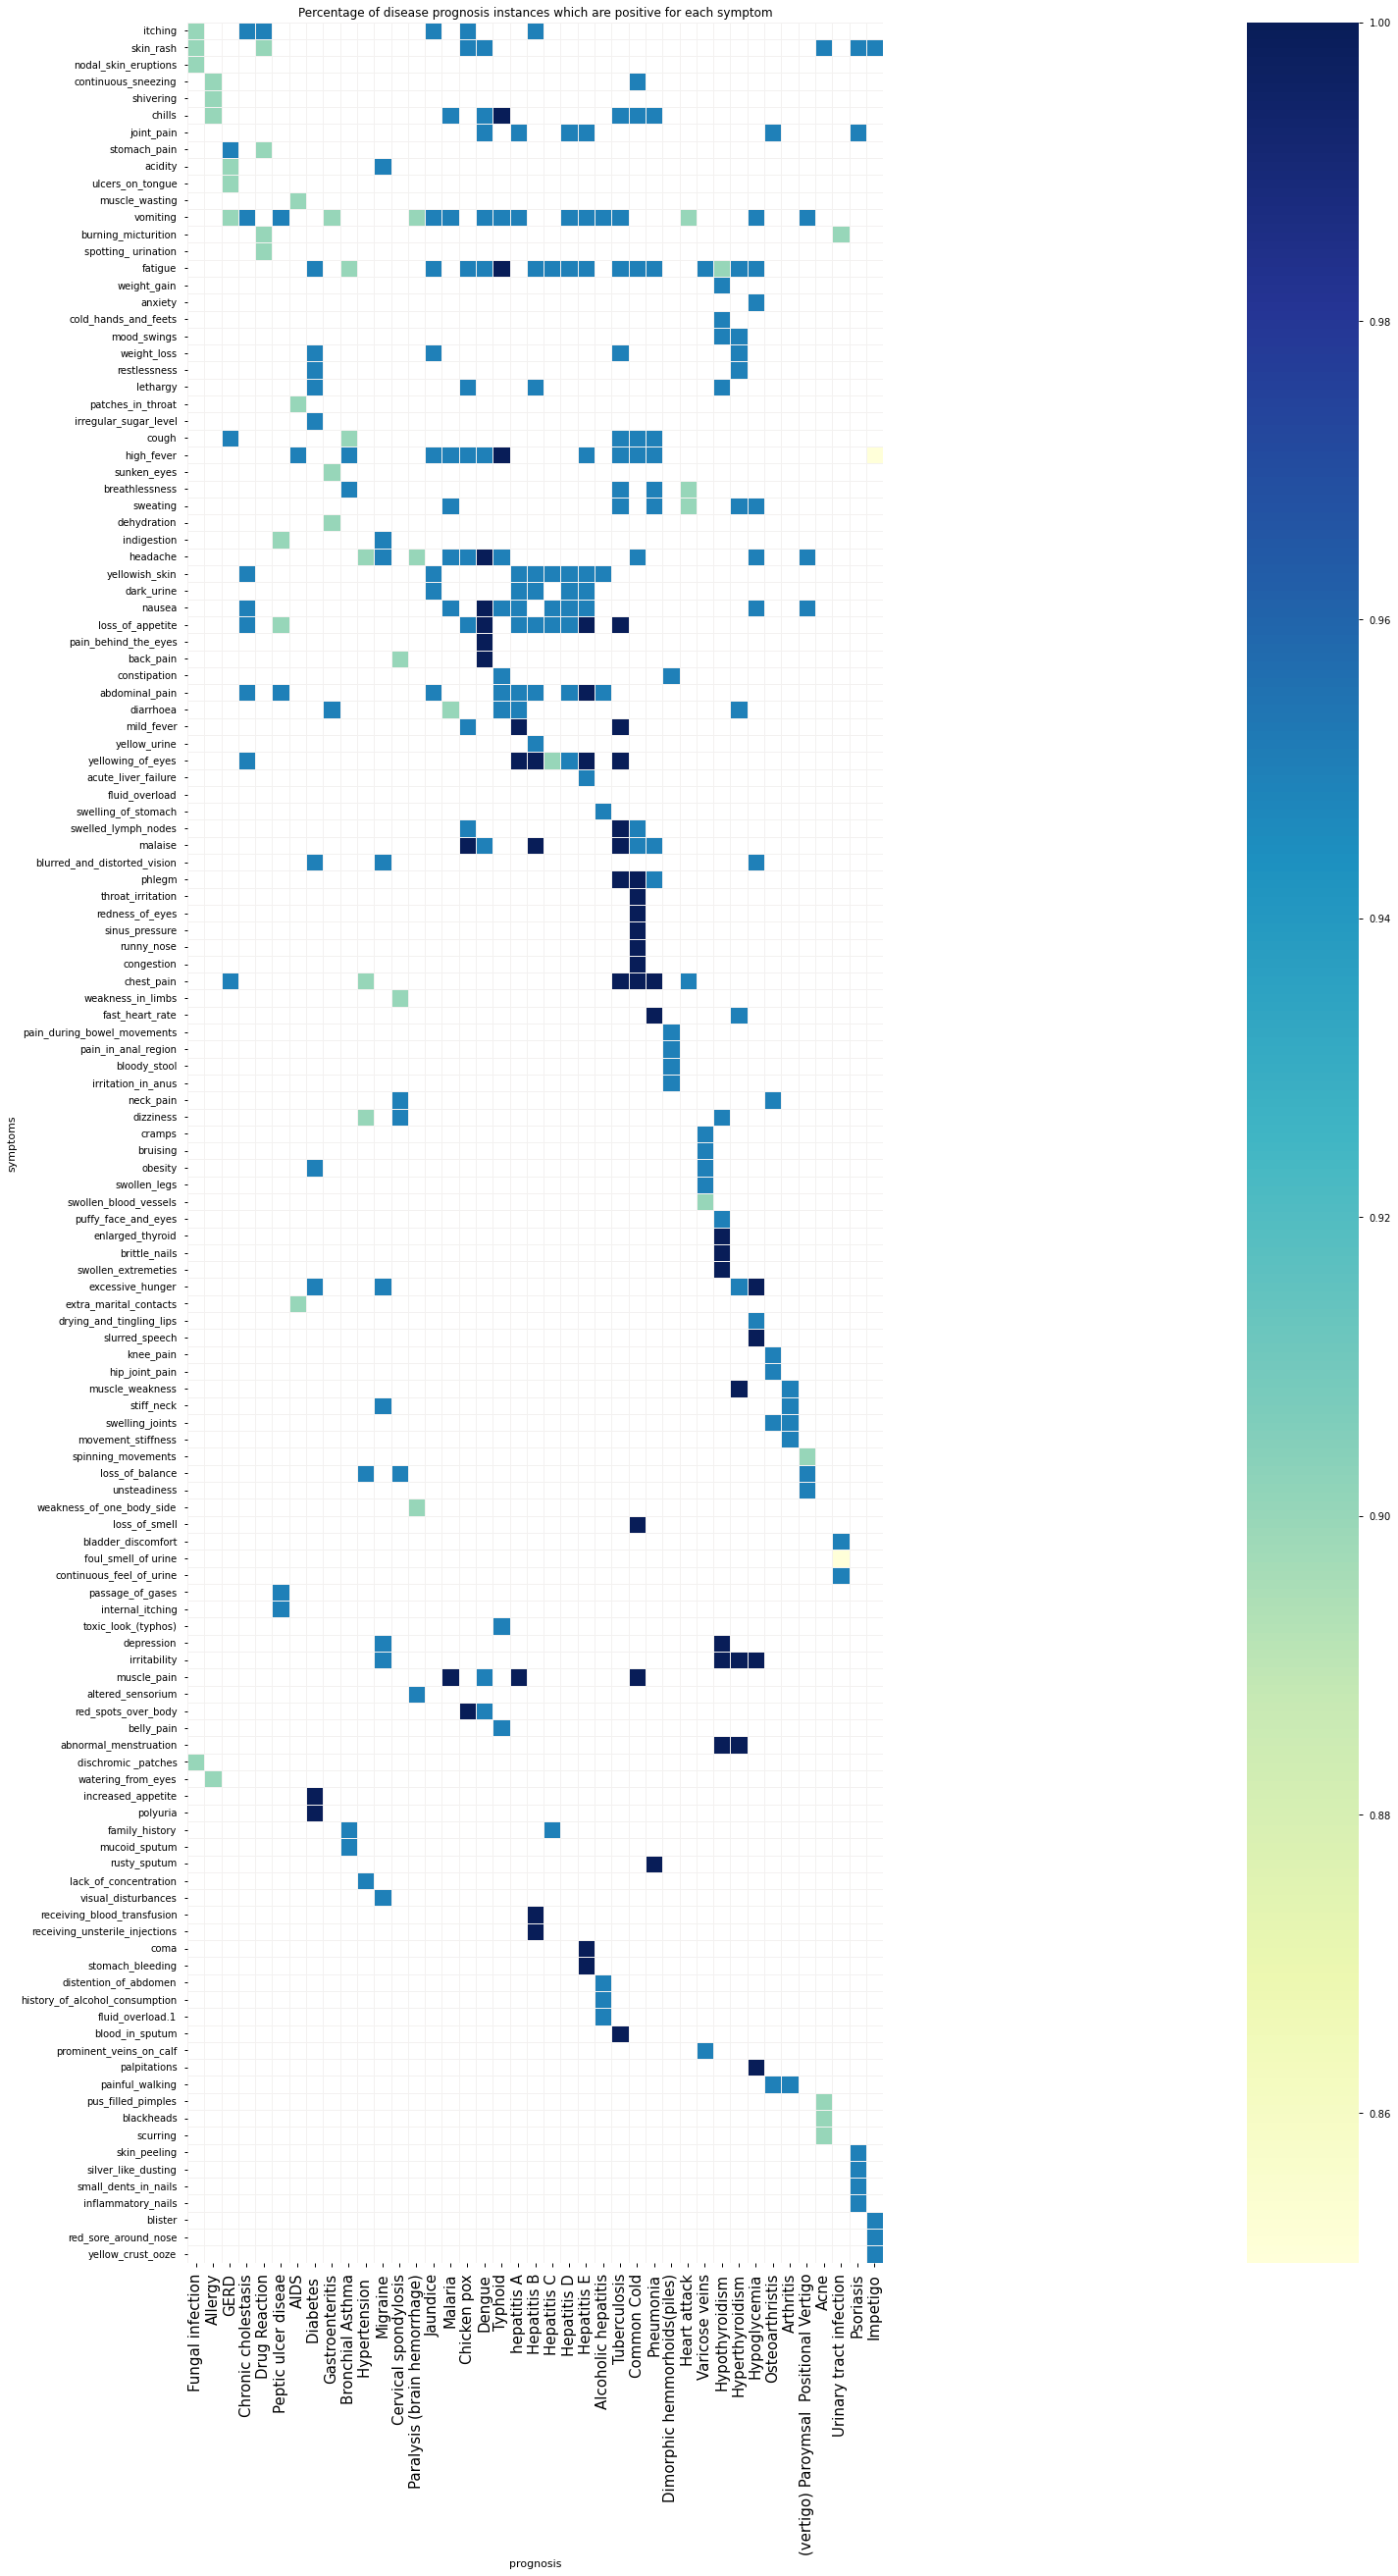

In [15]:
fig3, ax3 = plt.subplots(figsize = (133,42))
ax3 = sns.heatmap(perc_df, square=True, cmap="YlGnBu", linewidths=.5,linecolor='#F3F1F0')
ax3.tick_params(axis='x', labelsize = 15)
ax3.set_xlabel('prognosis')
ax3.set_title('Percentage of disease prognosis instances which are positive for each symptom')

We now have a very clear idea of the symptom profile for each of our 41 prognoses as well as a very clear picture of which prognoses are possible for each symptom. We know which symptoms are associated with only one prognosis and which symptoms are *always* included in a given prognosis. All of this information is going to enable us to build a strong model in the next step of this project!

To measure the predictive power of each symptom column on the prognosis, I'm going to calculate the predictive power score (PPS) and show this as a matrix. All code is modified from https://machinelearningknowledge.ai/predictive-power-score-vs-correlation-with-python-implementation/

In [16]:
import ppscore as pps 

In [17]:
pps.score(data, "prognosis", "itching") #PPS of 0.89 suggests a reasonably strong relationship between itching and prognosis


{'x': 'prognosis',
 'y': 'itching',
 'ppscore': 0.8832988522705467,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.1378048780487805,
 'model_score': 0.01608198743101002,
 'model': DecisionTreeRegressor()}

In [18]:
matrix = pps.matrix(data) #now let's form a matrix of PPS for all the data

In [19]:
matrix 
#well, that certainly came out differently from the example. 
#now I need to transform this matrix to visualize the PPS for each relationship

x                     y   ppscore            case  \
0        itching               itching  1.000000  predict_itself   
1        itching             skin_rash  0.000000      regression   
2        itching  nodal_skin_eruptions  0.000000      regression   
3        itching   continuous_sneezing  0.000000      regression   
4        itching             shivering  0.000000      regression   
...          ...                   ...       ...             ...   
17684  prognosis    inflammatory_nails  0.898658      regression   
17685  prognosis               blister  0.899645      regression   
17686  prognosis  red_sore_around_nose  0.895854      regression   
17687  prognosis     yellow_crust_ooze  0.901038      regression   
17688  prognosis             prognosis  1.000000  predict_itself   

       is_valid_score               metric  baseline_score  model_score  \
0                True                 None        0.000000     1.000000   
1                True  mean absolute error        0.159756     0.241406   
2                True  mean absolute error        0.021951     0.038369   
3                True  mean absolute error        0.045122     0.085522   
4                True  mean absolute error        0.021951     0.042796   
...               ...                  ...             ...          ...   
17684            True  mean absolute error        0.023171     0.002348   
17685            True  mean absolute error        0.023171     0.002325   
17686            True  mean absolute error        0.023171     0.002413   
17687            True  mean absolute error        0.023171     0.002293   
17688            True                 None        0.000000     1.000000   

                         model  
0                         None  
1      DecisionTreeRegressor()  
2      DecisionTreeRegressor()  
3      DecisionTreeRegressor()  
4      DecisionTreeRegressor()  
...                        ...  
17684  DecisionTreeRegressor()  
17685  DecisionTreeRegressor()  
17686  DecisionTreeRegressor()  
17687  DecisionTreeRegressor()  
17688                     None  

[17689 rows x 9 columns]

In [20]:
prognosis_pps = matrix[matrix["y"] == 'prognosis'] #extract out the rows of the matrix df that have prognosis as the dependent variable
prognosis_pps

x          y   ppscore            case  \
132                 itching  prognosis  0.000000  classification   
265               skin_rash  prognosis  0.000000  classification   
398    nodal_skin_eruptions  prognosis  0.002780  classification   
531     continuous_sneezing  prognosis  0.000000  classification   
664               shivering  prognosis  0.002801  classification   
...                     ...        ...       ...             ...   
17156    inflammatory_nails  prognosis  0.003474  classification   
17289               blister  prognosis  0.003474  classification   
17422  red_sore_around_nose  prognosis  0.003474  classification   
17555     yellow_crust_ooze  prognosis  0.003482  classification   
17688             prognosis  prognosis  1.000000  predict_itself   

       is_valid_score       metric  baseline_score  model_score  \
132              True  weighted F1        0.021545     0.008004   
265              True  weighted F1        0.021545     0.007297   
398              True  weighted F1        0.021545     0.024265   
531              True  weighted F1        0.021545     0.016595   
664              True  weighted F1        0.021545     0.024286   
...               ...          ...             ...          ...   
17156            True  weighted F1        0.021545     0.024944   
17289            True  weighted F1        0.021545     0.024944   
17422            True  weighted F1        0.021545     0.024944   
17555            True  weighted F1        0.021545     0.024951   
17688            True         None        0.000000     1.000000   

                          model  
132    DecisionTreeClassifier()  
265    DecisionTreeClassifier()  
398    DecisionTreeClassifier()  
531    DecisionTreeClassifier()  
664    DecisionTreeClassifier()  
...                         ...  
17156  DecisionTreeClassifier()  
17289  DecisionTreeClassifier()  
17422  DecisionTreeClassifier()  
17555  DecisionTreeClassifier()  
17688                      None  

[133 rows x 9 columns]

In [21]:
pps_matrix = prognosis_pps[['x','ppscore']]
pps_matrix = pps_matrix.set_index('x')
pps_matrix

ppscore
x                             
itching               0.000000
skin_rash             0.000000
nodal_skin_eruptions  0.002780
continuous_sneezing   0.000000
shivering             0.002801
...                        ...
inflammatory_nails    0.003474
blister               0.003474
red_sore_around_nose  0.003474
yellow_crust_ooze     0.003482
prognosis             1.000000

[133 rows x 1 columns]

Text(7091.547434210527, 0.5, 'target')

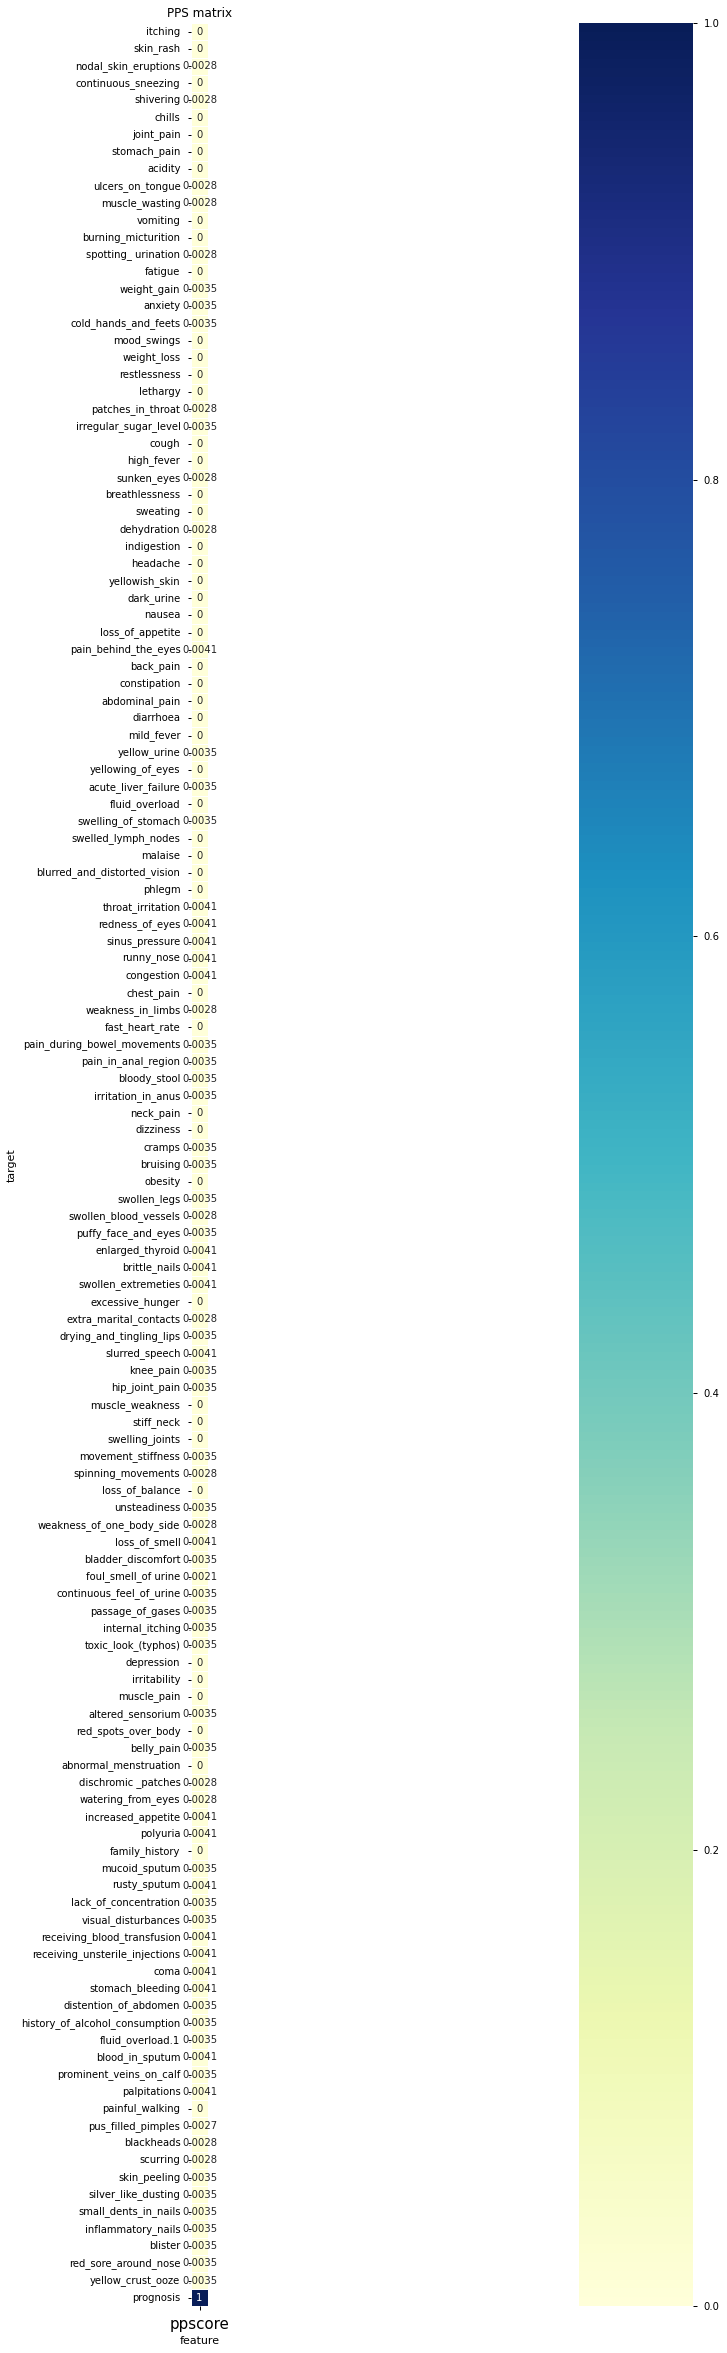

In [22]:
fig4, ax4 = plt.subplots(figsize = (133,42))
ax4 = sns.heatmap(pps_matrix, square=True, cmap="YlGnBu", linewidths=.5, annot=True)
ax4.tick_params(axis='x', labelsize = 15)
#ax4.set_xlabel('prognosis')
ax4.set_title('PPS matrix')
ax4.set_xlabel('feature')
ax4.set_ylabel('target')

### Evidently, no given symptom has a high predictive power for a given prognosis. I'm going to try doing this in the other direction, where the dependent variable in the PPS is the symptom and the prognosis is the independent variable.

In [23]:
prognosis_pps2 = matrix[matrix["x"] == 'prognosis'] #extract out the rows of the matrix df that have prognosis as the independent variable
prognosis_pps2

x                     y   ppscore            case  \
17556  prognosis               itching  0.883299      regression   
17557  prognosis             skin_rash  0.871474      regression   
17558  prognosis  nodal_skin_eruptions  0.797753      regression   
17559  prognosis   continuous_sneezing  0.846634      regression   
17560  prognosis             shivering  0.799294      regression   
...          ...                   ...       ...             ...   
17684  prognosis    inflammatory_nails  0.898658      regression   
17685  prognosis               blister  0.899645      regression   
17686  prognosis  red_sore_around_nose  0.895854      regression   
17687  prognosis     yellow_crust_ooze  0.901038      regression   
17688  prognosis             prognosis  1.000000  predict_itself   

       is_valid_score               metric  baseline_score  model_score  \
17556            True  mean absolute error        0.137805     0.016082   
17557            True  mean absolute error        0.159756     0.020533   
17558            True  mean absolute error        0.021951     0.004440   
17559            True  mean absolute error        0.045122     0.006920   
17560            True  mean absolute error        0.021951     0.004406   
...               ...                  ...             ...          ...   
17684            True  mean absolute error        0.023171     0.002348   
17685            True  mean absolute error        0.023171     0.002325   
17686            True  mean absolute error        0.023171     0.002413   
17687            True  mean absolute error        0.023171     0.002293   
17688            True                 None        0.000000     1.000000   

                         model  
17556  DecisionTreeRegressor()  
17557  DecisionTreeRegressor()  
17558  DecisionTreeRegressor()  
17559  DecisionTreeRegressor()  
17560  DecisionTreeRegressor()  
...                        ...  
17684  DecisionTreeRegressor()  
17685  DecisionTreeRegressor()  
17686  DecisionTreeRegressor()  
17687  DecisionTreeRegressor()  
17688                     None  

[133 rows x 9 columns]

In [24]:
pps_matrix2 = prognosis_pps2[['y','ppscore']]
pps_matrix2 = pps_matrix2.set_index('y')
pps_matrix2

ppscore
y                             
itching               0.883299
skin_rash             0.871474
nodal_skin_eruptions  0.797753
continuous_sneezing   0.846634
shivering             0.799294
...                        ...
inflammatory_nails    0.898658
blister               0.899645
red_sore_around_nose  0.895854
yellow_crust_ooze     0.901038
prognosis             1.000000

[133 rows x 1 columns]

Text(7091.547434210527, 0.5, 'target')

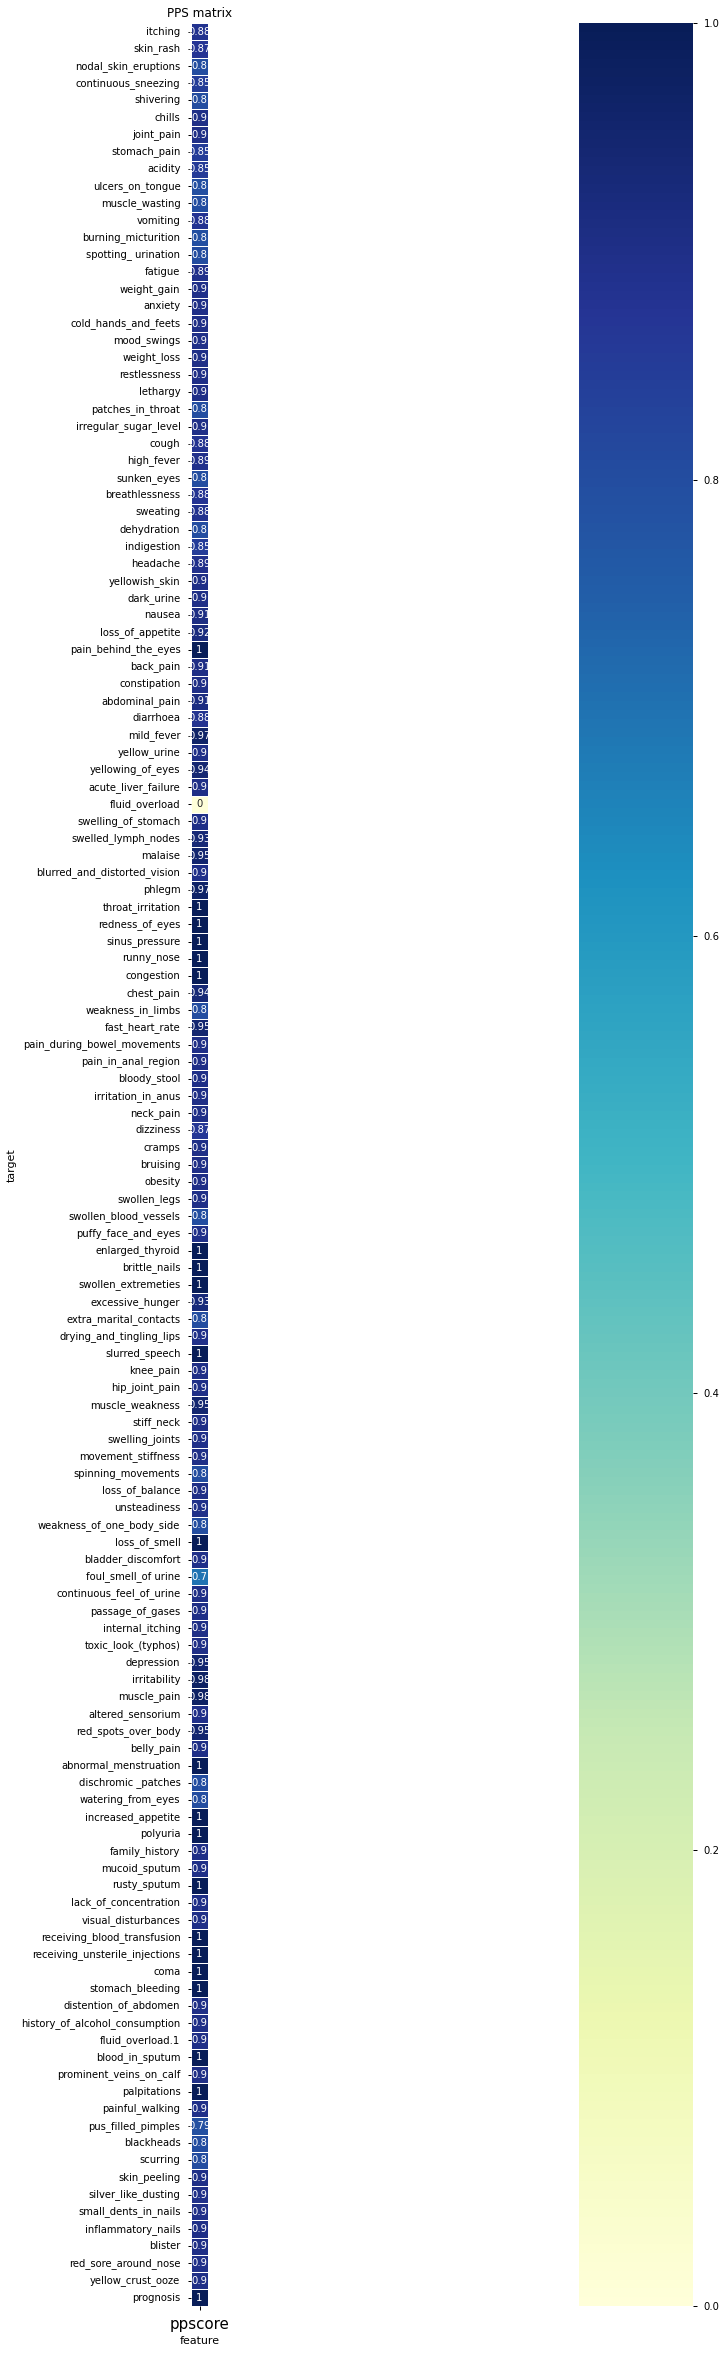

In [25]:
fig5, ax5 = plt.subplots(figsize = (133,42))
ax5 = sns.heatmap(pps_matrix2, square=True, cmap="YlGnBu", linewidths=.5, annot=True)
ax5.tick_params(axis='x', labelsize = 15)
ax5.set_title('PPS matrix')
ax5.set_xlabel('feature')
ax5.set_ylabel('target')

### This heatmap of PPS looks a lot like the percentage heatmap I did earlier, which showed the percentage of instances a symptom was positive for each prognosis. The symptoms with the PPS of 1, for instance, are those which were present 100% of the time for only one prognosis, for instance, and thereby are those with the greatest predictive power.

These include:
- pain_behind_the_eyes
- throat_irritation
- redness_of_eyes
- sinus_pressure
- runny_nose
- congestion
- enlarged_thyroid
- brittle_nails
- swollen_extremeties
- slurred_speech
- loss_of_smell
- abnormal_menstruation
- increased_appetite
- polyuria
- rusty_sputum
- receiving_blood_transfusion
- receiving_unsterile_injections
- coma
- stomach_bleeding
- blood_in_sputum
- palpitations

### how to increase cell size of heatmap to show the full annoted PPS values?
 The problem is actually the color scheme! White text will not show up on the white background. If I change the text color, or the color scheme, I can solve this problem. I will replot below.
### why is the PPS with "prognosis" as the independent (x) variable so much more meaningful than the PPS when it's the y variable?
 The answer has to do with causal inference. X-->Y will have a different relationship than Y-->X. In this case, I am interested in the PPS values of each symptom (X) on the prognosis (Y). Therefore, I need to use the PPS matrix that corresponds with this. I will replot an ordered index of PPS values below.
### am I interpreting this correctly, or am I falling into a logical fallacy?
 I definitely fell into a logical fallacy earlier, but with the ordered index of PPS values for symptom (X) --> prognosis (y), I can now accurately order the predictive power of each symptom on the prognosis. 

Text(0.5, 1.0, 'PPS values prognosis --> symptom')

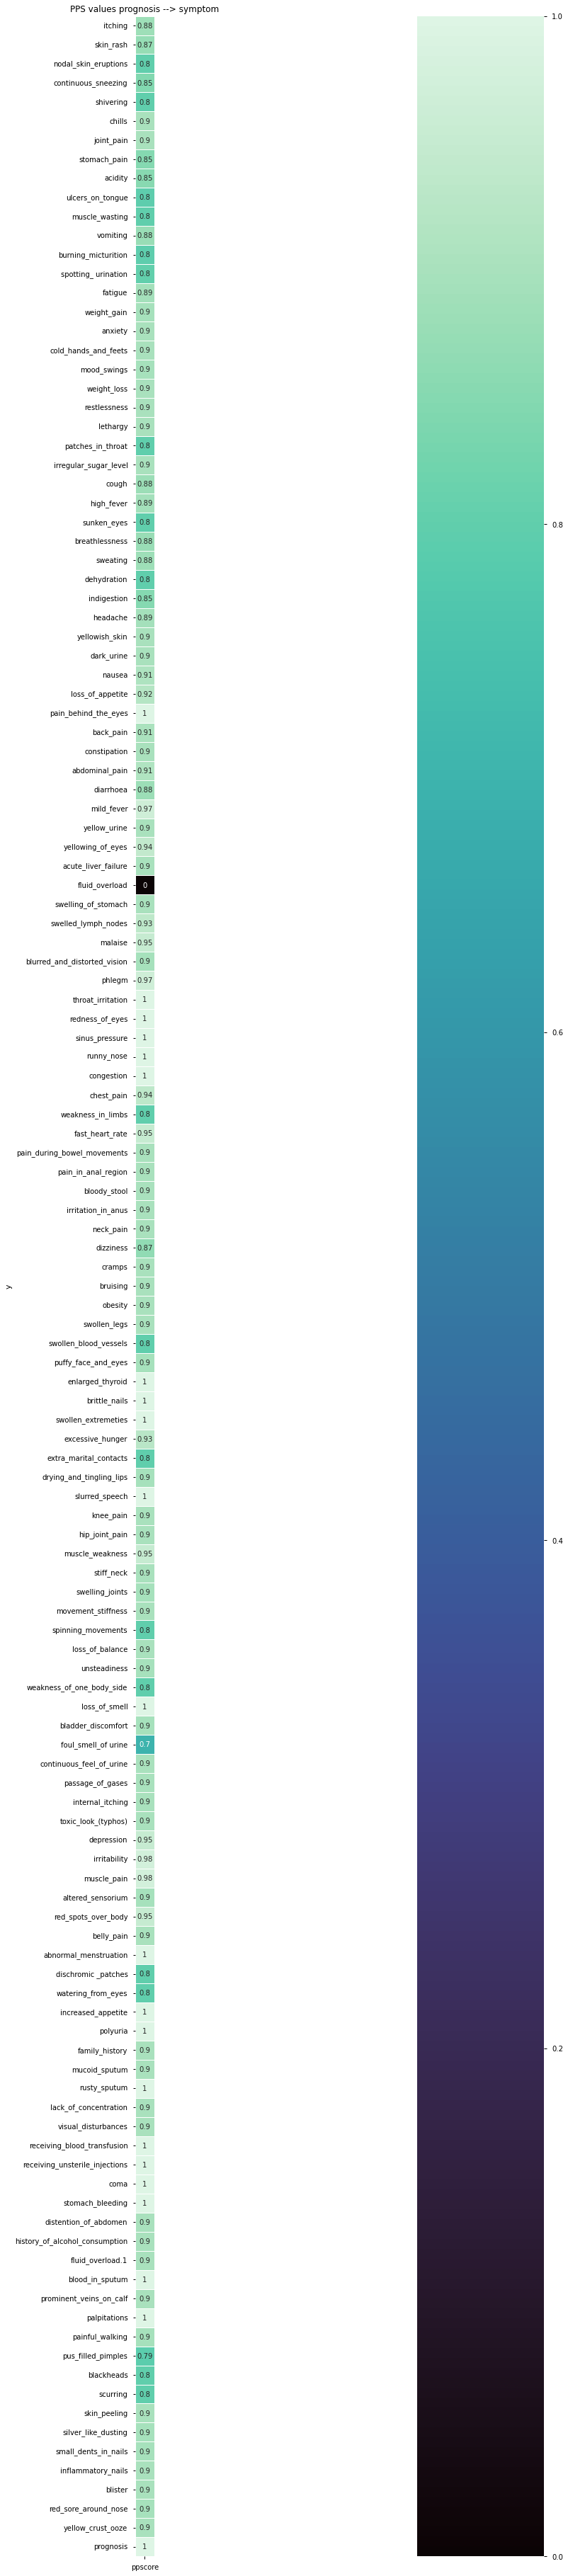

In [26]:
#plot 2nd matrix list with new color scheme to prove to myself that problem solving technique will work to display all PPS values
fig5, ax5 = plt.subplots(figsize = (133,66))
ax5 = sns.heatmap(pps_matrix2, square=True, cmap="mako", linewidths=.5, annot=True)
#ax5.tick_params(axis='x', labelsize = 15)
ax5.set_title('PPS values prognosis --> symptom')
#ax5.set_xlabel('feature')
#ax5.set_ylabel('target')

A much more straightforward way to understand just the PPS of each symptom on the target variable (prognosis) would be to use the following code:

In [27]:
pps = pps.predictors(data,'prognosis') #calculates only the PPS values for the other columns as predictors for the target
#this has muuuuch, much, much shorter run time, and automatically sorts the predictors by the PPS--nice!
pps

x          y   ppscore            case  \
0     pain_behind_the_eyes  prognosis  0.004124  classification   
1        throat_irritation  prognosis  0.004124  classification   
2          redness_of_eyes  prognosis  0.004124  classification   
3           sinus_pressure  prognosis  0.004124  classification   
4               runny_nose  prognosis  0.004124  classification   
..                     ...        ...       ...             ...   
127            muscle_pain  prognosis  0.000000  classification   
128    red_spots_over_body  prognosis  0.000000  classification   
129  abnormal_menstruation  prognosis  0.000000  classification   
130         family_history  prognosis  0.000000  classification   
131        painful_walking  prognosis  0.000000  classification   

     is_valid_score       metric  baseline_score  model_score  \
0              True  weighted F1        0.021545     0.025580   
1              True  weighted F1        0.021545     0.025580   
2              True  weighted F1        0.021545     0.025580   
3              True  weighted F1        0.021545     0.025580   
4              True  weighted F1        0.021545     0.025580   
..              ...          ...             ...          ...   
127            True  weighted F1        0.021545     0.011137   
128            True  weighted F1        0.021545     0.017756   
129            True  weighted F1        0.021545     0.017480   
130            True  weighted F1        0.021545     0.017054   
131            True  weighted F1        0.021545     0.016770   

                        model  
0    DecisionTreeClassifier()  
1    DecisionTreeClassifier()  
2    DecisionTreeClassifier()  
3    DecisionTreeClassifier()  
4    DecisionTreeClassifier()  
..                        ...  
127  DecisionTreeClassifier()  
128  DecisionTreeClassifier()  
129  DecisionTreeClassifier()  
130  DecisionTreeClassifier()  
131  DecisionTreeClassifier()  

[132 rows x 9 columns]

In [28]:
pps = pps[['x','ppscore']]
pps = pps.set_index('x')
pps

ppscore
x                              
pain_behind_the_eyes   0.004124
throat_irritation      0.004124
redness_of_eyes        0.004124
sinus_pressure         0.004124
runny_nose             0.004124
...                         ...
muscle_pain            0.000000
red_spots_over_body    0.000000
abnormal_menstruation  0.000000
family_history         0.000000
painful_walking        0.000000

[132 rows x 1 columns]

Text(7077.827386363638, 0.5, 'symptom')

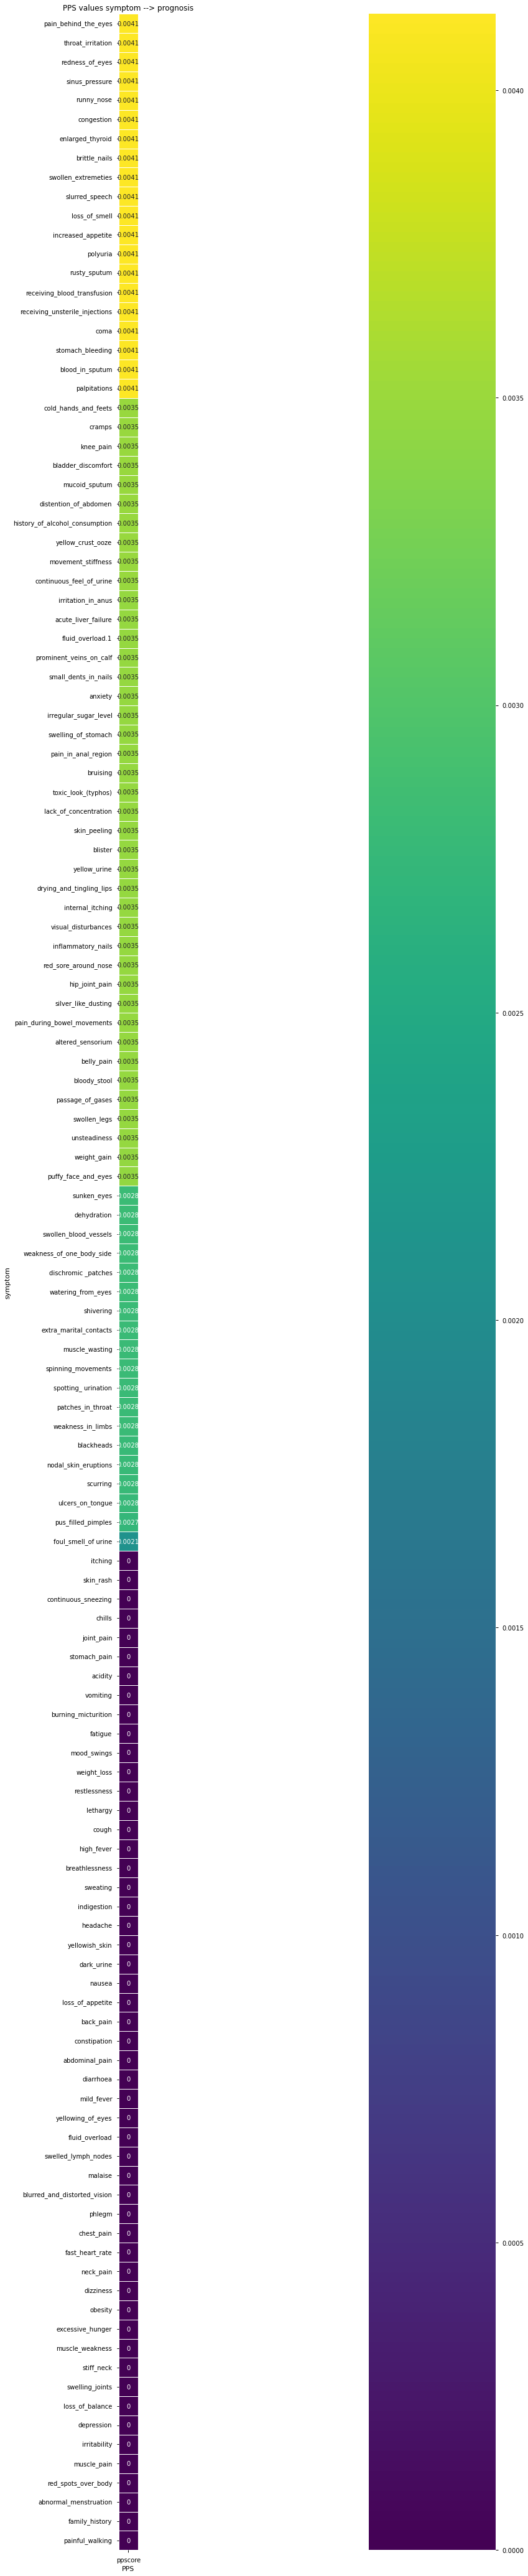

In [29]:
#plot 2nd matrix list with new color scheme to prove to myself that problem solving technique will work to display all PPS values
fig6, ax6 = plt.subplots(figsize = (133,75))
ax6 = sns.heatmap(pps, square=True, cmap="viridis", linewidths=.5, annot=True)
#ax5.tick_params(axis='x', labelsize = 15)
ax6.set_title('PPS values symptom --> prognosis')
ax6.set_xlabel('PPS')
ax6.set_ylabel('symptom')

### This final heatmap allows us to visualize the symptoms with the highest predictive power, and each subsequent tier. Cool!